In [1]:
import os, sys

In [2]:
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
from torchvision import  datasets
from torchvision.transforms import Compose, ToTensor, ConvertImageDtype, Resize
from torchvision.utils import  make_grid
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

d:\My_toolkits\Python\Python 3.9.6\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
sys.path.append('../../')
from models import DCGanGenerator, DCGanDiscriminator, DCGanTrainer

In [4]:
import importlib
importlib.reload(sys.modules['models'])

<module 'models' from 'd:\\Entertainment\\HCMUT\\IAS_lab\\research\\gans-collection\\notebooks\\dcgan\\../..\\models\\__init__.py'>

In [5]:
BATCH_SIZE = 32
Z_DIM = 100
IM_SHAPE = (1,32,32)
FEATURES_D = 128
FEATURES_G = 128
EPOCHS = 5

In [6]:
custom_transforms = Compose([
    ToTensor(),
    Resize(IM_SHAPE[-1], antialias=True),
    ConvertImageDtype(torch.float32)
])

dataset = datasets.MNIST(
    root='../../data', download=True,
    transform=custom_transforms)
loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

In [8]:
generator = DCGanGenerator(Z_DIM, IM_SHAPE, FEATURES_G).to(device)
discriminator =  DCGanDiscriminator(IM_SHAPE, FEATURES_D).to(device)
DCGanTrainer(EPOCHS, generator, discriminator, loader, device=device)

Epoch 1/5
1875/1875 - lossD: 0.0000 - lossG: 19.0780 - 1739s/epoch
Epoch 2/5
238/1875 - lossD: 0.0000 - lossG: 19.4061

KeyboardInterrupt: 

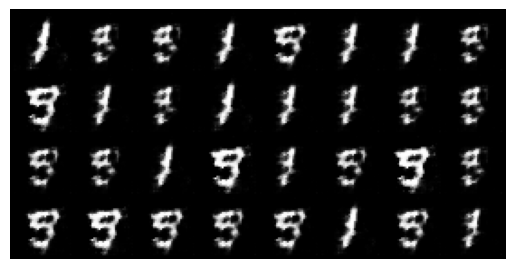

In [ ]:
noise = torch.randn([BATCH_SIZE, Z_DIM]).to(device)
img = make_grid(generator(noise)).detach().cpu().numpy().transpose([1,2,0])
plt.imshow(img,vmin=0, vmax=1, cmap='gray')
plt.axis('off')
plt.show()